# Try to shallow Getz iceshelf bathymetry

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs

In [2]:
home ='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/'
bathy_orig = xr.open_dataset(f'{home}bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20250715.nc')
IGE_domcfg = xr.open_dataset(f'{home}../eANT025-orig/domain_cfg_eANT025.L121.nc').squeeze()

In [8]:
def shallow_getz(ds):
    
    getz_mask = ds.isf_draft.copy()
    getz_mask = xr.where((getz_mask!=0)*(ds.nav_lon < -115)*(ds.nav_lon > -140), 1, 0) 

    # version 1 was -160 and did not have the -100
    new_var = xr.where(getz_mask==1, ds.isf_draft - 200, ds.isf_draft)
    new_var = xr.where(new_var < 0, ds.isf_draft - 100, new_var)
    new_var = xr.where(new_var < 0, ds.isf_draft, new_var)
    
    return new_var

In [9]:
bathy_new              = bathy_orig.copy()
isfdraft_new           = shallow_getz(bathy_orig)
bathy_new['isf_draft'] = isfdraft_new

In [10]:
bathy_new.to_netcdf(f'{home}bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20250715-shallow-getz2.nc', unlimited_dims=['time_counter'])

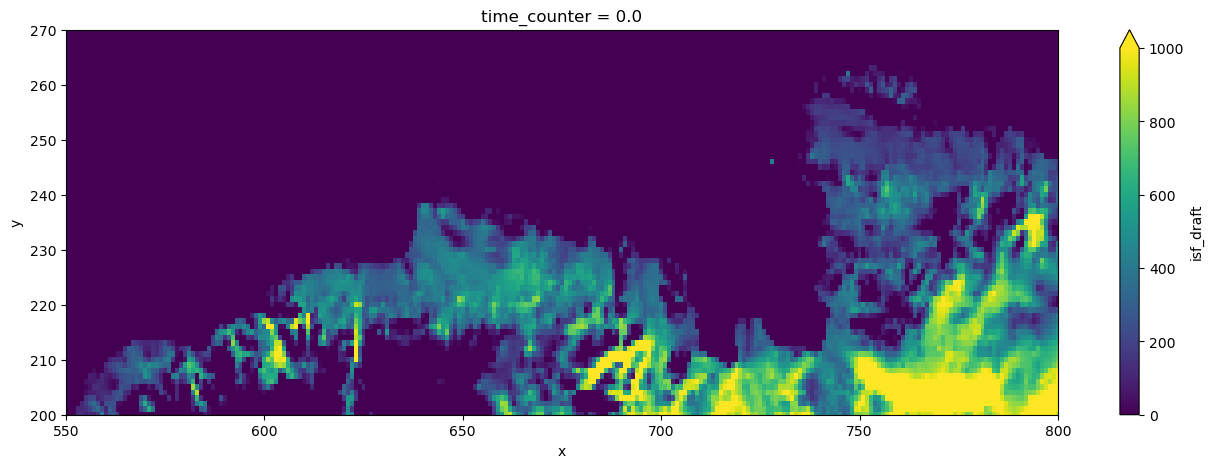

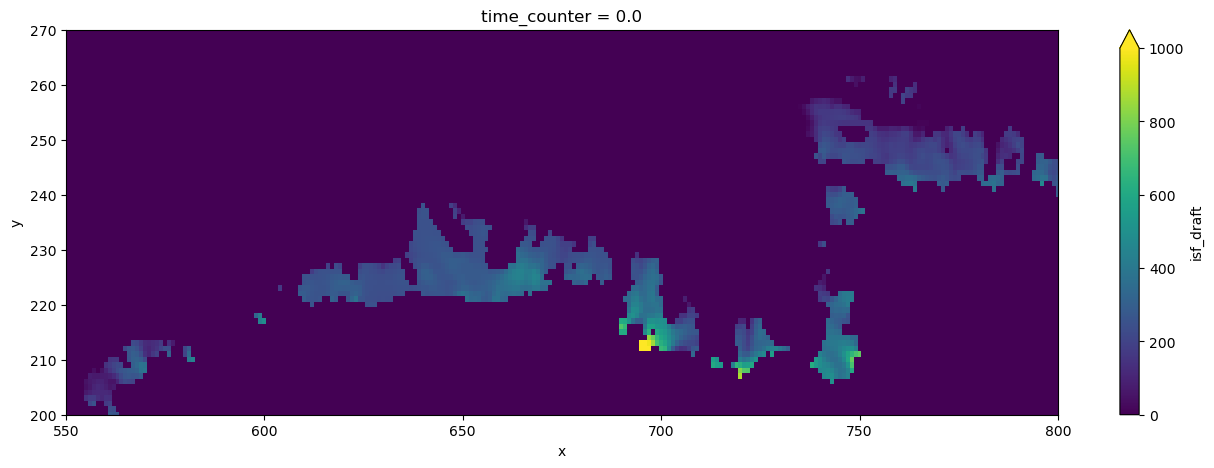

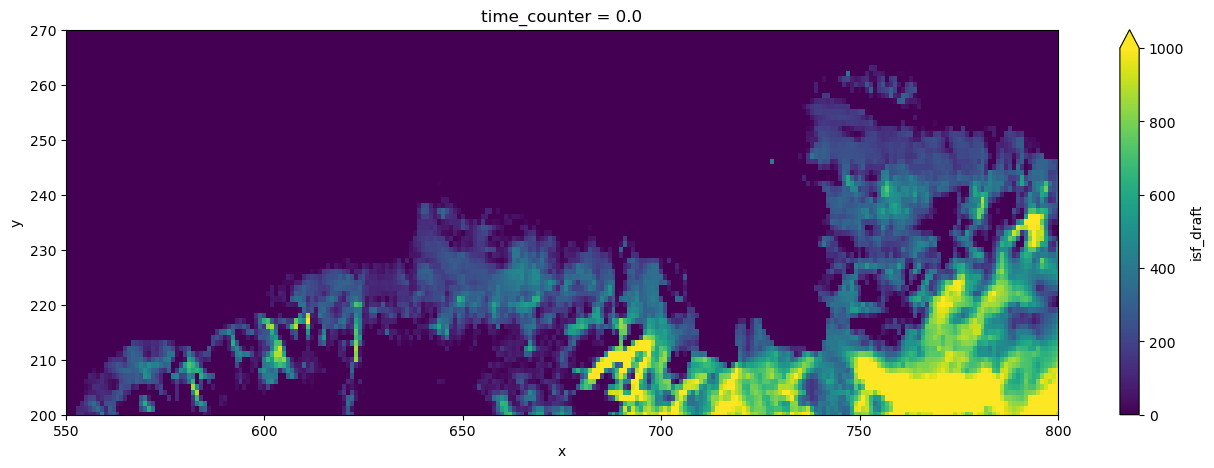

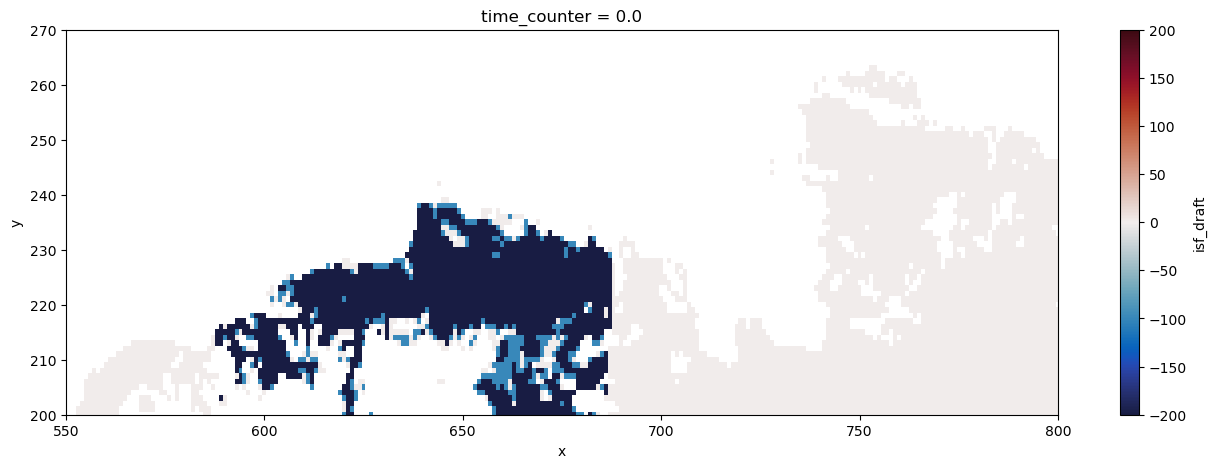

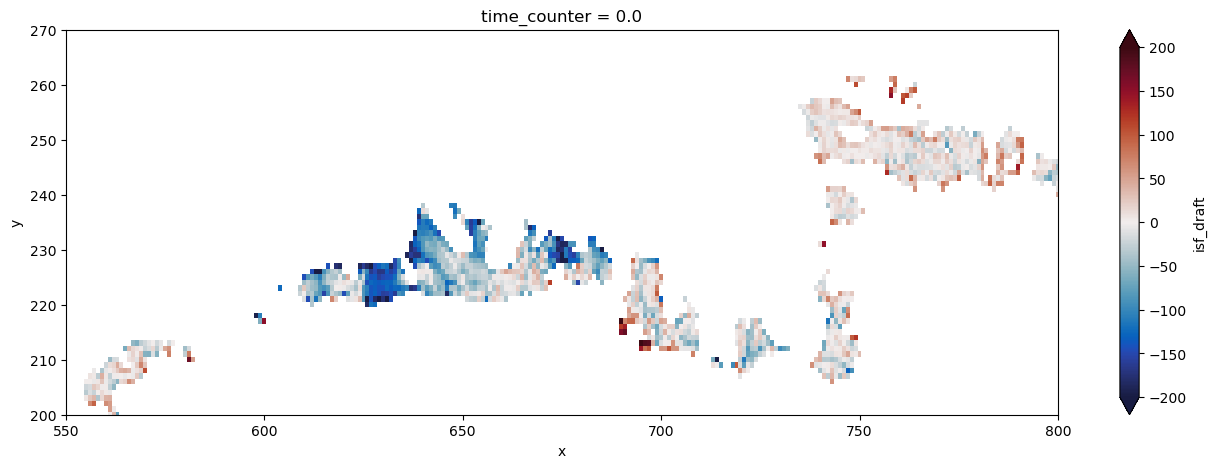

In [12]:
kwags = {'figsize':(16,5), 'xlim':(550,800),'ylim':(200,270)}
bathy_orig.isf_draft.plot(vmin=0, vmax=1000, **kwags)
IGE_domcfg.isf_draft.plot(vmin=0, vmax=1000, **kwags)
bathy_new.isf_draft.plot(vmin=0, vmax=1000, **kwags)

var_plot = (bathy_new.isf_draft - bathy_orig.isf_draft).where(bathy_orig.isf_draft!=0)
var_plot.plot(vmin=-200, vmax=200, cmap=cmocean.cm.balance, **kwags)
var_plot = (bathy_new.isf_draft.isel(y=slice(0,439)) - IGE_domcfg.isf_draft).where(IGE_domcfg.isf_draft!=0)
var_plot.plot(vmin=-200, vmax=200, cmap=cmocean.cm.balance, **kwags)